In [1]:
import matplotlib as mpl
import seaborn as sns
import matplotlib.cm as cm
import pickle
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import gridspec
import matplotlib.transforms as mtransforms

%matplotlib inline
%config InlineBackend.figure_format = 'svg'
sns.set_context('talk')#, font_scale=1.5)
mpl.rcParams.update({'text.usetex': False})
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
path_career='/mnt/sdb1/sandeep/5. NSF vs ERC/data/'
# GB_INLCUDED_OR_NOT='GB_NOT_INCLUDED'


# main figures

before:  frac_cross    176.580511
dtype: float64
after:  frac_cross    89.483567
dtype: float64


<ipython-input-72-e8acc4329dd2>:122: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


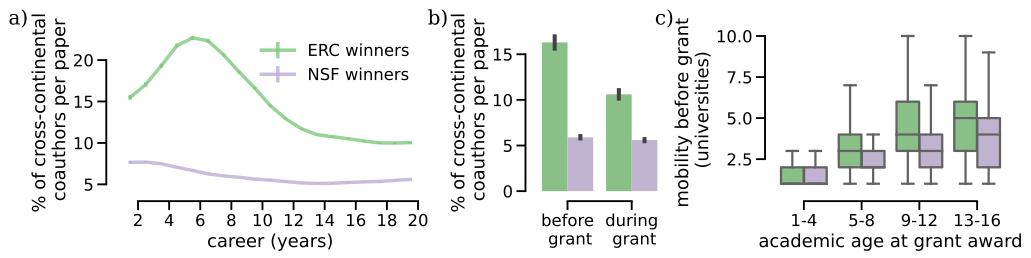

In [72]:
label_ff = 20
ff = 20
aa=16;bb=3;wspace_=.5;hspace_=.3
fig = plt.figure(figsize=(aa, bb));
spec = gridspec.GridSpec(ncols=3, nrows=1,
                         width_ratios=[1.2, .5,.9], wspace=wspace_,
                         hspace=hspace_, height_ratios=[1])



###########################
#Figure 2
##################################################################################
ax = fig.add_subplot(spec[0])
alpha=.8;
ini_=0
lw=3.5
ms=2

with open(path_career+'fig_natphysics_b_x_erc_vs_age.pkl','rb') as f:
    x = pickle.load(f)
    
x = [i-.5 for i in x]
    
with open(path_career+'fig_natphysics_b_y_erc_vs_age.pkl','rb') as f:
    y = pickle.load(f)
    
with open(path_career+'fig_natphysics_b_yerr_erc_vs_age.pkl','rb') as f:
    y_err = pickle.load(f)
    
ax.errorbar(x, y, y_err , mfc='w',mec='w', ms=0, lw=lw,mew=lw,color='#7fc97f',ecolor='#7fc97f',alpha=alpha,label=r'ERC winners')

with open(path_career+'fig_natphysics_b_x_nsf_vs_age.pkl','rb') as f:
    x = pickle.load(f)

x = [i-.5 for i in x]
    
with open(path_career+'fig_natphysics_b_y_nsf_vs_age.pkl','rb') as f:
    y = pickle.load(f)
    
with open(path_career+'fig_natphysics_b_yerr_nsf_vs_age.pkl','rb') as f:
    y_err = pickle.load(f)
ax.errorbar(x,y,y_err , mfc='w',mec='w', ms=0,lw=lw, mew=lw,color='#beaed4',ecolor='#beaed4',alpha=alpha,label=r'NSF winners')
ax.legend(frameon=False)
ax.set_xticks(range(2,22,2))
ax.set_ylabel('% of cross-continental \ncoauthors per paper')#,fontsize=ff)
ax.set_xlabel('career (years)')#,fontsize=ff)
trans = mtransforms.ScaledTranslation(-20/72, 7/72, fig.dpi_scale_trans)
ax.text(-0.35, 1.0, 'a)', transform=ax.transAxes,# + trans,
            fontsize=label_ff, va='bottom', fontfamily='serif')

sns.despine(ax=ax)

###########################
#Figure 2
##########################################
ax = fig.add_subplot(spec[1])
with open(path_career+'fig_natphysics_a.pkl','rb') as f:
    df_ = pickle.load(f)

meanlineprops = dict(linestyle='-', linewidth=2.5, color='white')
palette={'before\n grant':'#e7298a','during\n grant':'#1f78b4'}

df_['x'] = df_['x'].map({'before grant':'before\n grant',
                         'during grant':'during\n grant'})
palette={'NSF':'#beaed4','ERC':'#7fc97f'}

ax=sns.barplot(x=df_['x'],y=df_['frac_cross']*100,hue=df_[''],palette=palette,order=['before\n grant','during\n grant' ])



ylab_=''
ax.set_ylabel('% of cross-continental \ncoauthors per paper')#,fontsize=ff)
ax.set_xlabel('')#,fontsize=ff)
ax.set_yticks(np.array([0,5,10,15,]))
#plt.xticks(fontsize=ff)
# trans = mtransforms.ScaledTranslation(-20/72, 7/72, fig.dpi_scale_trans)
# ax.text(-0.35, .95, 'c)', transform=ax.transAxes,# + trans,
#             fontsize=label_ff, va='bottom', fontfamily='serif')
sns.despine(offset=10, trim=True)
plt.legend([],[], frameon=False)

# ax.set_ylabel('% of cross-continental \ncoauthors per paper')#,fontsize=ff)
trans = mtransforms.ScaledTranslation(-20/72, 7/72, fig.dpi_scale_trans)
ax.text(-0.84, 1, 'b)', transform=ax.transAxes,# + trans,
            fontsize=label_ff, va='bottom', fontfamily='serif')
#simpleaxis(ax)
#plt.xticks(fontsize=ff)
sns.despine(ax=ax)
temp=df_.groupby(by=['x','']).mean()
print('before: ',(temp.iloc[0]-temp.iloc[1])/temp.iloc[1]*100)
print('after: ',(temp.iloc[2]-temp.iloc[3])/temp.iloc[3]*100)

#####################
# Figure 3
###############################################################
ax = fig.add_subplot(spec[2])


with open(path_career+'fig_natphysics_c.pkl','rb') as f:
    df_= pickle.load(f)

    
palette={'NSF':'#beaed4','ERC':'#7fc97f'}

ax=sns.boxplot(data=df_, x='age_at_win', y='mobility',hue='grant',showfliers=False,palette=palette,hue_order=['ERC','NSF'] )
ax.set_ylabel('mobility before grant \n(universities)')
ax.set_xlabel('academic age at grant award')
meanlineprops = dict(linestyle='-', linewidth=2.5, color='white')
sns.despine(ax=ax)
# ax.set_ylabel('% of cross-continental \ncoauthors per grant winner')#,fontsize=ff)
# ax.set_xlabel('')#,fontsize=ff)
# ax.set_yticks(np.array([0,4,8,12]))
# #plt.xticks(fontsize=ff)
trans = mtransforms.ScaledTranslation(-20/72, 7/72, fig.dpi_scale_trans)
ax.text(-0.52, 1, 'c)', transform=ax.transAxes,# + trans,
            fontsize=label_ff, va='bottom', fontfamily='serif')
sns.despine(offset=10, trim=True)
plt.legend([],[], frameon=False);


plt.tight_layout()
plt.savefig('nature_physics1.svg',dpi=300, bbox_inches = "tight")
# plt.savefig('Figure_new_'+GB_INLCUDED_OR_NOT+'.pdf')

In [ ]:
from mpl_toolkits.axes_grid1 import make_axes_locatable

label_ff = 20
ff = 20
aa=16;bb=2.5;wspace_=.5;hspace_=.3

wspace_=.5
fig = plt.figure(figsize=(aa, bb));
spec = gridspec.GridSpec(ncols=3, nrows=1,
                         width_ratios=[1.35, 1,.7], wspace=wspace_,
                         hspace=hspace_, height_ratios=[1])

# #####################
# # Figure 4
# ##########################################
ax = fig.add_subplot(spec[0])
ff_smaller=ff-10

# fig_natphysics_e_v2
with open(path_career+'fig_natphysics_SI_ratio_ERC_NSF_eu_countries.pkl','rb') as f:
    df= pickle.load(f)
with open(path_career+'dict_count_ERC_winners_per_country.pkl','rb') as f:
    dict_count_ERC_winners_per_country= pickle.load(f)

df=df.replace({'Czech Republic':'Czechia'})


def colors_from_values(values, palette_name):
    # normalize the values to range [0, 1]
    normalized = (values - min(values)) / (max(values) - min(values))
    # convert to indices
    indices = np.round(normalized * (len(values) - 1)).astype(np.int32)
    # use the indices to get the colors
    palette = sns.color_palette(palette_name, len(values))
    return np.array(palette).take(indices, axis=0)

def set_axis_style(ax, labels,rot_):
    ax.xaxis.set_tick_params(direction='out')
#     ax.yaxis.set_ticks_position('bottom')
    ax.set_xticks(np.arange(0, len(labels) ))
    ax.set_xticklabels(labels,rotation=rot_,fontsize=ff_smaller)
#     ax.set_xlim(-.5, len(labels) + 0.75)



dict_count_ERC_winners_per_country['Malta']=1
z=[dict_count_ERC_winners_per_country[c] for c in list(df["country"])]
df['counts_awards']=z


df=df.sort_values(by='counts_awards')
# ax=sns.barplot(x=df["country"], y=df['% collabs'],palette=palette)
# ax=sns.barplot(x=df["country"], y=df['% collabs'],hue=z,palette=palette)

ax = sns.barplot(x=df["country"], y=df['% collabs'], hue=survival_rates, palette='mako',dodge=False)

# ax.set_ylabel('n passengers')
survival_rates=(df['counts_awards'])
norm = plt.Normalize(survival_rates.min(), survival_rates.max())
sm = plt.cm.ScalarMappable(cmap="mako", norm=norm)
sm.set_array([])
ax.get_legend().remove()
#add color bar below chart
divider = make_axes_locatable(ax)
cax = divider.new_vertical(size='4%', pad=0.6)
fig.add_axes(cax)

cbar=ax.figure.colorbar(sm, cax=cax, label='number of ERC awards won',orientation='horizontal')
for t in cbar.ax.get_xticklabels():
     t.set_fontsize(ff_smaller)
cbar.set_label(label='number of ERC awards won',size=ff_smaller)

# for t in cbar.ax.get_xlabels():
#      t.set_fontsize(ff_smaller)


ylab_=r"$\frac{\%\ of\ ERC\ winners'\ collaborations}{\%\ of\ NSF\ winners'\ collaborations}$"
ylab_=r"$\frac{\%\ collaborations_{ERC} -\%\ collaborations_{ NSF}}{\%\ collaborations_{ERC} +\%\ collaborations_{NSF}}$"
ylab_=r"$\frac{\%\ ERC\ collaborations\ attracted}{\%\ NSF\ collaborations\ attracted}$"


ax.set_ylabel(ylab_)
ax.set_xlabel('')

xx=list(df['country'])
trans = mtransforms.ScaledTranslation(-20/72, 7/72, fig.dpi_scale_trans)
ax.text(-0.4, 1.65, 'd)', transform=ax.transAxes,# + trans,
            fontsize=label_ff, va='bottom', fontfamily='serif')
sns.despine(ax=ax,offset=10, trim=True)
set_axis_style(ax, xx,90)










# #####################
# # Figure 5
# ##########################################
ax= fig.add_subplot(spec[1])
# fig_natphysics_d_v2
with open(path_career+'fig_natphysics_SI_ratio_ERC_NSF_non_eu_top_countries.pkl','rb') as f:
    df= pickle.load(f)
df=df.replace({'Russian Federation':'Russia'})
ax_=sns.barplot(x=df["country"], y=df['% collabs']-1,bottom=1,color='steelblue')
# ax_=sns.barplot(x=df["country"], y=df['% collabs'])
ylab_=r"$\frac{\%\ of\ ERC\ winners'\ collaborations}{\%\ of\ NSF\ winners'\ collaborations}$"
ylab_=r"$\frac{\%\ ERC\ collaborations\ attracted}{\%\ NSF\ collaborations\ attracted}$"

# ylab_=r"$\frac{\%\ collaborations_{ERC} -\%\ collaborations_{ NSF}}{\%\ collaborations_{ERC} +\%\ collaborations_{NSF}}$"
# ylab_=r"$relative difference in \n \%\ incoming\ collaborations\ from\ ERC\ and\ NSF$"
# ylab_="relative difference in % incoming \n collaborations from ERC and NSF$"
ax.set_ylabel(ylab_)
# ax.set_yticks([0,1,2,3,4])
ax.set_xlabel('')

xx=list(df['country'])
ax.set_yticks([0,1,2,3,4]);

trans = mtransforms.ScaledTranslation(-20/72, 7/72, fig.dpi_scale_trans)
ax_.text(-0.5, 1.1, 'e)', transform=ax_.transAxes,# + trans,
            fontsize=label_ff, va='bottom', fontfamily='serif')
sns.despine(ax=ax,offset=10, trim=True)
set_axis_style(ax, xx,90)










# #####################
# # Figure 6
# ##########################################
import matplotlib.pyplot as plt
import numpy as np

from adjustText import adjust_text
from faker import Faker
from palmerpenguins import load_penguins
from distinctipy import distinctipy
ax= fig.add_subplot(spec[2])

with open(path_career+'fig_natphysics_f_dict_size_of_disciplines_top.pkl','rb') as f:
    top20disciplines_counts= pickle.load(f)
with open(path_career+'fig_natphysics_f_nsf_disciplinewise.pkl','rb') as f:
    nsf_static_dis= pickle.load(f)
with open(path_career+'fig_natphysics_f_erc_disciplinewise.pkl','rb') as f:
    erc_static_dis= pickle.load(f)

    
x_leg=1;y_leg=.5;
ndis=10
colors_=distinctipy.get_colors(ndis+1)
top20disciplines=[k for k in top20disciplines_counts.keys()]
xx={x_:1.07 for x_ in top20disciplines[0:ndis]};
xx={x_:1.07 for x_ in top20disciplines[0:ndis]};
yy={x_:1.01 for x_ in top20disciplines[0:ndis]}
# yy['Biology']=.9;xx['Biology']=.9
# yy['Computer science']=.85;xx['Computer science']=.1
# yy['Psychology']=.98;xx['Psychology']=1.02
yy['Physics']=1.05;xx['Physics']=1.05
# yy['Chemistry']=;
xx['Chemistry']=.8
# yy['Engineering']=1.01;xx['Engineering']=1
# yy['Materials science']=.95;xx['Materials science']=1.1
# yy['Political science']=.95;xx['Political science']=1
# yy['Geography']=.99;xx['Geography']=1.05
# yy['Geology']=.99;xx['Geology']=1.05

sign=1
TEXTS = []    
for dis,it in zip(top20disciplines[0:ndis],range(0,ndis)):
    size_=top20disciplines_counts[dis]/max(top20disciplines_counts.values())
#     size_=size_**0.5
    ax.plot(nsf_static_dis[dis],erc_static_dis[dis],'o',ms=25*size_,alpha=.2,color=colors_[it])
#     ax.plot(nsf_static_dis[dis],erc_static_dis[dis],'o',ms=25*size_,label=dis,alpha=.2,color=colors_[it])
#     ax.annotate(dis, [nsf_static_dis[dis]*xx[dis],erc_static_dis[dis]*yy[dis]],color=colors_[it],fontsize=ff-14)
# for dis,it in zip[0:],range(0,ndis)):
    TEXTS.append(ax.text(nsf_static_dis[dis]*xx[dis], erc_static_dis[dis]*yy[dis],dis, color=colors_[it], fontsize=ff-13))

ax.plot([6.1,11],[6.1,11],'--',color='black',label=r'balanced',alpha=.6,linewidth=1)
ax.text(7, 6, 'balanced',fontsize=label_ff-10, va='bottom', fontfamily='serif',alpha=.6)

# ax.set_facecolor('azure')


ax.set_ylim([6,18]);
ax.set_xlim([4,10]);
ax.set_yticks(range(6,18,2));
ax.set_xticks(range(4,12,2));



ax.set_xlabel('% EU coauthors per NSF paper')#,fontsize=ff);
ax.set_ylabel('% US coauthors \nper ERC paper')#,fontsize=ff);
trans = mtransforms.ScaledTranslation(-20/72, 7/72, fig.dpi_scale_trans)
ax.text(-0.6, 1.1, 'f)', transform=ax.transAxes,# + trans,
            fontsize=label_ff, va='bottom', fontfamily='serif')
sns.despine(ax=ax,offset=10, trim=True)
GREY50 = "#7F7F7F"   

adjust_text(
    TEXTS, 
    expand_points=(1.2, 1.2),
    arrowprops=dict(
        arrowstyle="-", 
        color=GREY50, 
        lw=1,alpha=0    ),
    ax=ax
)        
plt.tight_layout()
plt.savefig('nature_physics2.svg',dpi=300, bbox_inches = "tight")

<ipython-input-309-69fdcc8791a9>:219: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


<ipython-input-308-a75463232e73>:219: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


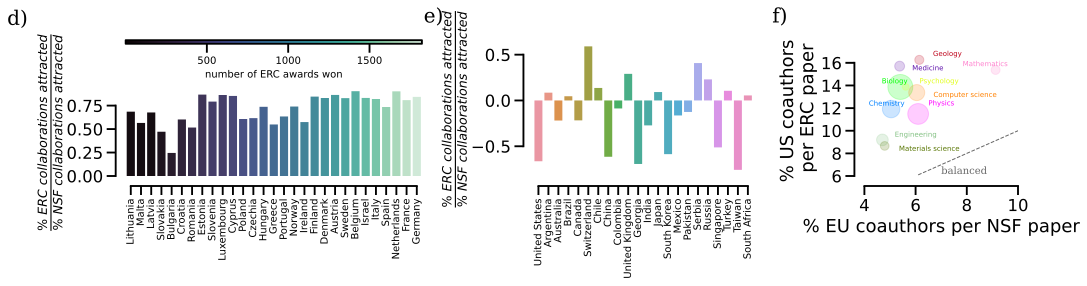

In [308]:
from mpl_toolkits.axes_grid1 import make_axes_locatable

label_ff = 20
ff = 20
aa=16;bb=2.5;wspace_=.5;hspace_=.3

wspace_=.5
fig = plt.figure(figsize=(aa, bb));
spec = gridspec.GridSpec(ncols=3, nrows=1,
                         width_ratios=[1.35, 1,.7], wspace=wspace_,
                         hspace=hspace_, height_ratios=[1])

# #####################
# # Figure 4
# ##########################################
ax = fig.add_subplot(spec[0])
ff_smaller=ff-10

# fig_natphysics_e_v2
with open(path_career+'fig_natphysics_e_v2.pkl','rb') as f:
    df= pickle.load(f)
with open(path_career+'dict_count_ERC_winners_per_country.pkl','rb') as f:
    dict_count_ERC_winners_per_country= pickle.load(f)

df=df.replace({'Czech Republic':'Czechia'})


def colors_from_values(values, palette_name):
    # normalize the values to range [0, 1]
    normalized = (values - min(values)) / (max(values) - min(values))
    # convert to indices
    indices = np.round(normalized * (len(values) - 1)).astype(np.int32)
    # use the indices to get the colors
    palette = sns.color_palette(palette_name, len(values))
    return np.array(palette).take(indices, axis=0)

def set_axis_style(ax, labels,rot_):
    ax.xaxis.set_tick_params(direction='out')
#     ax.yaxis.set_ticks_position('bottom')
    ax.set_xticks(np.arange(0, len(labels) ))
    ax.set_xticklabels(labels,rotation=rot_,fontsize=ff_smaller)
#     ax.set_xlim(-.5, len(labels) + 0.75)



dict_count_ERC_winners_per_country['Malta']=1
z=[dict_count_ERC_winners_per_country[c] for c in list(df["country"])]
df['counts_awards']=z


df=df.sort_values(by='counts_awards')
# ax=sns.barplot(x=df["country"], y=df['% collabs'],palette=palette)
# ax=sns.barplot(x=df["country"], y=df['% collabs'],hue=z,palette=palette)

ax = sns.barplot(x=df["country"], y=df['% collabs'], hue=survival_rates, palette='mako',dodge=False)

# ax.set_ylabel('n passengers')
survival_rates=(df['counts_awards'])
norm = plt.Normalize(survival_rates.min(), survival_rates.max())
sm = plt.cm.ScalarMappable(cmap="mako", norm=norm)
sm.set_array([])
ax.get_legend().remove()
#add color bar below chart
divider = make_axes_locatable(ax)
cax = divider.new_vertical(size='4%', pad=0.6)
fig.add_axes(cax)

cbar=ax.figure.colorbar(sm, cax=cax, label='number of ERC awards won',orientation='horizontal')
for t in cbar.ax.get_xticklabels():
     t.set_fontsize(ff_smaller)
cbar.set_label(label='number of ERC awards won',size=ff_smaller)

# for t in cbar.ax.get_xlabels():
#      t.set_fontsize(ff_smaller)


ylab_=r"$\frac{\%\ of\ ERC\ winners'\ collaborations}{\%\ of\ NSF\ winners'\ collaborations}$"
ylab_=r"$\frac{\%\ collaborations_{ERC} -\%\ collaborations_{ NSF}}{\%\ collaborations_{ERC} +\%\ collaborations_{NSF}}$"
ylab_=r"$\frac{\%\ ERC\ collaborations\ attracted}{\%\ NSF\ collaborations\ attracted}$"


ax.set_ylabel(ylab_)
ax.set_xlabel('')

xx=list(df['country'])
trans = mtransforms.ScaledTranslation(-20/72, 7/72, fig.dpi_scale_trans)
ax.text(-0.4, 1.65, 'd)', transform=ax.transAxes,# + trans,
            fontsize=label_ff, va='bottom', fontfamily='serif')
sns.despine(ax=ax,offset=10, trim=True)
set_axis_style(ax, xx,90)










# #####################
# # Figure 5
# ##########################################
ax= fig.add_subplot(spec[1])
# fig_natphysics_d_v2
with open(path_career+'fig_natphysics_d_v2.pkl','rb') as f:
    df= pickle.load(f)
df=df.replace({'Russian Federation':'Russia'})
# ax_=sns.barplot(x=df["country"], y=df['% collabs']-1,bottom=1)
ax_=sns.barplot(x=df["country"], y=df['% collabs'],color='steelblu')
ylab_=r"$\frac{\%\ of\ ERC\ winners'\ collaborations}{\%\ of\ NSF\ winners'\ collaborations}$"
ylab_=r"$\frac{\%\ ERC\ collaborations\ attracted}{\%\ NSF\ collaborations\ attracted}$"

# ylab_=r"$\frac{\%\ collaborations_{ERC} -\%\ collaborations_{ NSF}}{\%\ collaborations_{ERC} +\%\ collaborations_{NSF}}$"
# ylab_=r"$relative difference in \n \%\ incoming\ collaborations\ from\ ERC\ and\ NSF$"
# ylab_="relative difference in % incoming \n collaborations from ERC and NSF$"
ax.set_ylabel(ylab_)
# ax.set_yticks([0,1,2,3,4])
ax.set_xlabel('')

xx=list(df['country'])
# ax.set_yticks([0,1,2,3,4]);

trans = mtransforms.ScaledTranslation(-20/72, 7/72, fig.dpi_scale_trans)
ax_.text(-0.5, 1.1, 'e)', transform=ax_.transAxes,# + trans,
            fontsize=label_ff, va='bottom', fontfamily='serif')
sns.despine(ax=ax,offset=10, trim=True)
set_axis_style(ax, xx,90)










# #####################
# # Figure 6
# ##########################################
import matplotlib.pyplot as plt
import numpy as np

from adjustText import adjust_text
from faker import Faker
from palmerpenguins import load_penguins
from distinctipy import distinctipy
ax= fig.add_subplot(spec[2])

with open(path_career+'fig_natphysics_f_dict_size_of_disciplines_top.pkl','rb') as f:
    top20disciplines_counts= pickle.load(f)
with open(path_career+'fig_natphysics_f_nsf_disciplinewise.pkl','rb') as f:
    nsf_static_dis= pickle.load(f)
with open(path_career+'fig_natphysics_f_erc_disciplinewise.pkl','rb') as f:
    erc_static_dis= pickle.load(f)

    
x_leg=1;y_leg=.5;
ndis=10
colors_=distinctipy.get_colors(ndis+1)
top20disciplines=[k for k in top20disciplines_counts.keys()]
xx={x_:1.07 for x_ in top20disciplines[0:ndis]};
xx={x_:1.07 for x_ in top20disciplines[0:ndis]};
yy={x_:1.01 for x_ in top20disciplines[0:ndis]}
# yy['Biology']=.9;xx['Biology']=.9
# yy['Computer science']=.85;xx['Computer science']=.1
# yy['Psychology']=.98;xx['Psychology']=1.02
yy['Physics']=1.05;xx['Physics']=1.05
# yy['Chemistry']=;
xx['Chemistry']=.8
# yy['Engineering']=1.01;xx['Engineering']=1
# yy['Materials science']=.95;xx['Materials science']=1.1
# yy['Political science']=.95;xx['Political science']=1
# yy['Geography']=.99;xx['Geography']=1.05
# yy['Geology']=.99;xx['Geology']=1.05

sign=1
TEXTS = []    
for dis,it in zip(top20disciplines[0:ndis],range(0,ndis)):
    size_=top20disciplines_counts[dis]/max(top20disciplines_counts.values())
#     size_=size_**0.5
    ax.plot(nsf_static_dis[dis],erc_static_dis[dis],'o',ms=25*size_,alpha=.2,color=colors_[it])
#     ax.plot(nsf_static_dis[dis],erc_static_dis[dis],'o',ms=25*size_,label=dis,alpha=.2,color=colors_[it])
#     ax.annotate(dis, [nsf_static_dis[dis]*xx[dis],erc_static_dis[dis]*yy[dis]],color=colors_[it],fontsize=ff-14)
# for dis,it in zip[0:],range(0,ndis)):
    TEXTS.append(ax.text(nsf_static_dis[dis]*xx[dis], erc_static_dis[dis]*yy[dis],dis, color=colors_[it], fontsize=ff-13))

ax.plot([6.1,11],[6.1,11],'--',color='black',label=r'balanced',alpha=.6,linewidth=1)
ax.text(7, 6, 'balanced',fontsize=label_ff-10, va='bottom', fontfamily='serif',alpha=.6)

# ax.set_facecolor('azure')


ax.set_ylim([6,18]);
ax.set_xlim([4,10]);
ax.set_yticks(range(6,18,2));
ax.set_xticks(range(4,12,2));



ax.set_xlabel('% EU coauthors per NSF paper')#,fontsize=ff);
ax.set_ylabel('% US coauthors \nper ERC paper')#,fontsize=ff);
trans = mtransforms.ScaledTranslation(-20/72, 7/72, fig.dpi_scale_trans)
ax.text(-0.6, 1.1, 'f)', transform=ax.transAxes,# + trans,
            fontsize=label_ff, va='bottom', fontfamily='serif')
sns.despine(ax=ax,offset=10, trim=True)
GREY50 = "#7F7F7F"   

adjust_text(
    TEXTS, 
    expand_points=(1.2, 1.2),
    arrowprops=dict(
        arrowstyle="-", 
        color=GREY50, 
        lw=1,alpha=0    ),
    ax=ax
)        
plt.tight_layout()
plt.savefig('nature_physics2_v2.svg',dpi=300, bbox_inches = "tight")

# SI 1

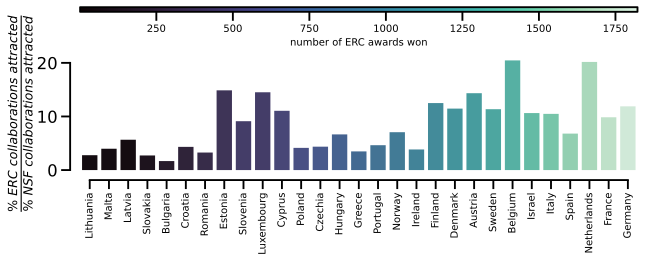

In [258]:
label_ff = 20
ff = 20
wspace_=.5
aa=10;bb=3;wspace_=.5;hspace_=.3

fig = plt.figure(figsize=(aa, bb));
spec = gridspec.GridSpec(ncols=1, nrows=1,
                         width_ratios=[1], wspace=wspace_,
                         hspace=hspace_, height_ratios=[1])

# #####################
# # Figure 4
# ##########################################
ax = fig.add_subplot(spec[0])
ff_smaller=ff-10

with open(path_career+'fig_natphysics_SI_ratio_ERC_NSF_eu_countries.pkl','rb') as f:
    df= pickle.load(f)
with open(path_career+'dict_count_ERC_winners_per_country.pkl','rb') as f:
    dict_count_ERC_winners_per_country= pickle.load(f)

df=df.replace({'Czech Republic':'Czechia'})


def colors_from_values(values, palette_name):
    # normalize the values to range [0, 1]
    normalized = (values - min(values)) / (max(values) - min(values))
    # convert to indices
    indices = np.round(normalized * (len(values) - 1)).astype(np.int32)
    # use the indices to get the colors
    palette = sns.color_palette(palette_name, len(values))
    return np.array(palette).take(indices, axis=0)

def set_axis_style(ax, labels,rot_):
    ax.xaxis.set_tick_params(direction='out')
#     ax.yaxis.set_ticks_position('bottom')
    ax.set_xticks(np.arange(0, len(labels) ))
    ax.set_xticklabels(labels,rotation=rot_,fontsize=ff_smaller)
#     ax.set_xlim(-.5, len(labels) + 0.75)



dict_count_ERC_winners_per_country['Malta']=1
z=[dict_count_ERC_winners_per_country[c] for c in list(df["country"])]
df['counts_awards']=z


df=df.sort_values(by='counts_awards')
# ax=sns.barplot(x=df["country"], y=df['% collabs'],palette=palette)
# ax=sns.barplot(x=df["country"], y=df['% collabs'],hue=z,palette=palette)

ax = sns.barplot(x=df["country"], y=df['% collabs'], hue=survival_rates, palette='mako',dodge=False)

# ax.set_ylabel('n passengers')
survival_rates=(df['counts_awards'])
norm = plt.Normalize(survival_rates.min(), survival_rates.max())
sm = plt.cm.ScalarMappable(cmap="mako", norm=norm)
sm.set_array([])
ax.get_legend().remove()
#add color bar below chart
divider = make_axes_locatable(ax)
cax = divider.new_vertical(size='4%', pad=0.6)
fig.add_axes(cax)

cbar=ax.figure.colorbar(sm, cax=cax, label='number of ERC awards won',orientation='horizontal')
for t in cbar.ax.get_xticklabels():
     t.set_fontsize(ff_smaller)
# cbar.set_label(label='number of ERC awards won',size=ff_smaller,weight='bold')
cbar.set_label(label='number of ERC awards won',size=ff_smaller)

# for t in cbar.ax.get_xlabels():
#      t.set_fontsize(ff_smaller)


ylab_=r"$\frac{\%\ of\ ERC\ winners'\ collaborations}{\%\ of\ NSF\ winners'\ collaborations}$"
ylab_=r"$\frac{\%\ collaborations_{ERC} -\%\ collaborations_{ NSF}}{\%\ collaborations_{ERC} +\%\ collaborations_{NSF}}$"
ylab_=r"$\frac{\%\ ERC\ collaborations\ attracted}{\%\ NSF\ collaborations\ attracted}$"

ax.set_ylabel(ylab_)
ax.set_xlabel('')

xx=list(df['country'])
trans = mtransforms.ScaledTranslation(-20/72, 7/72, fig.dpi_scale_trans)
# ax.text(-0.2, 1.4, 'd)', transform=ax.transAxes,# + trans,
#             fontsize=label_ff, va='bottom', fontfamily='serif')
sns.despine(ax=ax,offset=10, trim=True)
set_axis_style(ax, xx,90)
plt.savefig('nature_physics_SI_ratio_eu_countries.svg',dpi=300, bbox_inches = "tight")
plt.savefig('nature_physics_SI_ratio_eu_countries.pdf',dpi=300, bbox_inches = "tight")

# SI 2

<ipython-input-226-86e9503a37b7>:32: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


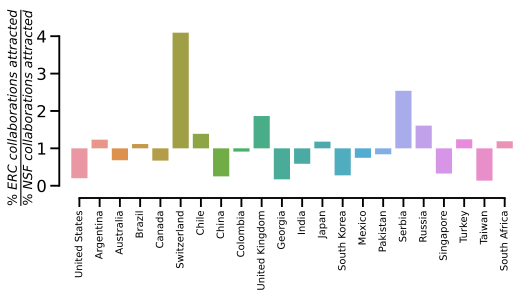

In [226]:

wspace_=.5
aa=8;bb=3;wspace_=.5;hspace_=.3

fig = plt.figure(figsize=(aa, bb));
spec = gridspec.GridSpec(ncols=1, nrows=1,
                         width_ratios=[1], wspace=wspace_,
                         hspace=hspace_, height_ratios=[1])

# #####################
# # Figure 5
# ##########################################
ax= fig.add_subplot(spec[0])

with open(path_career+'fig_natphysics_SI_ratio_ERC_NSF_non_eu_top_countries.pkl','rb') as f:
    df= pickle.load(f)
df=df.replace({'Russian Federation':'Russia'})
ax_=sns.barplot(x=df["country"], y=df['% collabs']-1,bottom=1)
# ax_=sns.barplot(x=df["country"], y=df['% collabs'])
ylab_=r"$\frac{\%\ of\ ERC\ winners'\ collaborations}{\%\ of\ NSF\ winners'\ collaborations}$"
ylab_=r"$\frac{\%\ ERC\ collaborations\ attracted}{\%\ NSF\ collaborations\ attracted}$"
ax.set_ylabel(ylab_)
ax.set_yticks([0,1,2,3,4])
ax.set_xlabel('')

xx=list(df['country'])

# trans = mtransforms.ScaledTranslation(-20/72, 7/72, fig.dpi_scale_trans)
# ax_.text(-0.52, 1, 'e)', transform=ax_.transAxes,# + trans,
#             fontsize=label_ff, va='bottom', fontfamily='serif')
sns.despine(ax=ax,offset=10, trim=True)
set_axis_style(ax, xx,90)
plt.tight_layout()

plt.savefig('nature_physics_SI_ratio_non_eu_countries.svg',dpi=300, bbox_inches = "tight")
plt.savefig('nature_physics_SI_ratio_non_eu_countries.pdf',dpi=300, bbox_inches = "tight")

# SI 3

before:  frac_cross    194.010042
dtype: float64
after:  frac_cross   -17.451798
dtype: float64


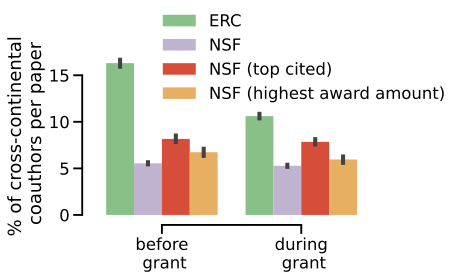

In [310]:
label_ff = 20
ff = 20
wspace_=.5
aa=5;bb=3;wspace_=.5;hspace_=.3

fig = plt.figure(figsize=(aa, bb));
# spec = gridspec.GridSpec(ncols=1, nrows=1,
#                          width_ratios=[1], wspace=wspace_,
#                          hspace=hspace_, height_ratios=[1])

# #####################
# # Figure 4
# ##########################################
ax = fig.add_subplot()
with open(path_career+'fig_natphysics_SI_filter_by_money.pkl','rb') as f:
    df1 = pickle.load(f)
with open(path_career+'fig_natphysics_SI_filter_by_citations.pkl','rb') as f:
    df2 = pickle.load(f)
with open(path_career+'fig_natphysics_a.pkl','rb') as f:
    df3= pickle.load(f)
    
df2['']=df2[''].replace({"NSF":'NSF (top cited)'})
df1['']=df1[''].replace({"NSF":'NSF (highest award amount)'})
df3['']=df3[''].replace({"NSF":'NSF'})
df_=pd.concat([df3,df2,df1])
palette={'NSF':'#beaed4','ERC':'#7fc97f','NSF (top cited)':'#f03b20','NSF (highest award amount)':'#feb24c'}

meanlineprops = dict(linestyle='-', linewidth=2.5, color='white')
# palette={'before\n grant':'#e7298a','during\n grant':'#1f78b4'}
df_['x'] = df_['x'].map({'before grant':'before\n grant',
                         'during grant':'during\n grant'})

ax=sns.barplot(x=df_['x'],y=df_['frac_cross']*100,hue=df_[''],palette=palette,order=['before\n grant','during\n grant' ])



ylab_=''
ax.set_ylabel('% of cross-continental \ncoauthors per paper')#,fontsize=ff)
ax.set_xlabel('')#,fontsize=ff)
ax.set_yticks(np.array([0,5,10,15,]))
#plt.xticks(fontsize=ff)
# trans = mtransforms.ScaledTranslation(-20/72, 7/72, fig.dpi_scale_trans)
# ax.text(-0.35, .95, 'c)', transform=ax.transAxes,# + trans,
#             fontsize=label_ff, va='bottom', fontfamily='serif')
sns.despine(offset=10, trim=True)
plt.legend(frameon=False,bbox_to_anchor=[.2,.6])

# ax.set_ylabel('% of cross-continental \ncoauthors per paper')#,fontsize=ff)
# trans = mtransforms.ScaledTranslation(-20/72, 7/72, fig.dpi_scale_trans)
# ax.text(-0.84, 1, 'b)', transform=ax.transAxes,# + trans,
#             fontsize=label_ff, va='bottom', fontfamily='serif')
#simpleaxis(ax)
#plt.xticks(fontsize=ff)
sns.despine(ax=ax)
temp=df_.groupby(by=['x','']).mean()
print('before: ',(temp.iloc[0]-temp.iloc[1])/temp.iloc[1]*100)
print('after: ',(temp.iloc[2]-temp.iloc[3])/temp.iloc[3]*100)
# plt.tight_layout()
plt.savefig('nature_physics_SI_before_after_citations.svg',dpi=300, bbox_inches = "tight")
plt.savefig('nature_physics_SI_before_after_citations.pdf',dpi=300, bbox_inches = "tight")

In [312]:
temp=df_.groupby(by=['x','']).mean()
# print('before: ',(temp.iloc[0]-temp.iloc[1])/temp.iloc[1]*100)
# print('after: ',(temp.iloc[2]-temp.iloc[3])/temp.iloc[3]*100)


In [313]:
temp

frac_cross
x                                                    
before\n grant ERC                           0.163020
               NSF                           0.055447
               NSF (highest award amount)    0.067373
               NSF (top cited)               0.081616
during\n grant ERC                           0.106113
               NSF                           0.052785
               NSF (highest award amount)    0.059591
               NSF (top cited)               0.078450

In [316]:
print('before: ',(temp.iloc[0]-temp.iloc[1])/temp.iloc[1]*100)
print('before (top money): ',(temp.iloc[0]-temp.iloc[2])/temp.iloc[2]*100)
print('before (top citations): ',(temp.iloc[0]-temp.iloc[3])/temp.iloc[3]*100)

print('after: ',(temp.iloc[4]-temp.iloc[5])/temp.iloc[5]*100)
print('after (top money): ',(temp.iloc[4]-temp.iloc[6])/temp.iloc[6]*100)
print('after (top citations): ',(temp.iloc[4]-temp.iloc[7])/temp.iloc[7]*100)


before:  frac_cross    194.010042
dtype: float64
before (top money):  frac_cross    141.967417
dtype: float64
before (top citations):  frac_cross    99.739752
dtype: float64
after:  frac_cross    101.027366
dtype: float64
after (top money):  frac_cross    78.069284
dtype: float64
after (top citations):  frac_cross    35.262417
dtype: float64


# SI 4

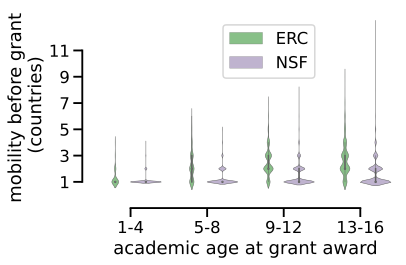

In [260]:

#####################
# Figure 3
###############################################################
ax = fig.add_subplot(spec[0])


with open(path_career+'fig_natphysics_SI_mobility_countries.pkl','rb') as f:
    df_= pickle.load(f)

    
palette={'NSF':'#beaed4','ERC':'#7fc97f'}
df_.columns=['age_at_win','mobility','']
# ax=sns.boxplot(data=df_, x='age_at_win', y='mobility',hue='grant',showfliers=False,palette=palette,hue_order=['ERC','NSF'] )
meanlineprops = dict(linestyle='-', linewidth=2.5, color='white')

ax=sns.violinplot(data=df_, x='age_at_win', y='mobility',linewidth=.5,hue='',palette=palette,hue_order=['ERC','NSF'] )
ax.set_ylabel('mobility before grant \n(countries)')
ax.set_xlabel('academic age at grant award')
sns.despine(ax=ax)
# ax.set_ylabel('% of cross-continental \ncoauthors per grant winner')#,fontsize=ff)
# ax.set_xlabel('')#,fontsize=ff)
ax.set_yticks(np.array([1,3,5,7,9,11]))
# #plt.xticks(fontsize=ff)
trans = mtransforms.ScaledTranslation(-20/72, 7/72, fig.dpi_scale_trans)
# ax.text(-0.52, 1, 'c)', transform=ax.transAxes,# + trans,
#             fontsize=label_ff, va='bottom', fontfamily='serif')
sns.despine(offset=10, trim=True)
plt.legend(bbox_to_anchor=[.4,.6]);

plt.tight_layout()

plt.savefig('nature_physics_SI_mobility_countries.svg',dpi=300, bbox_inches = "tight")
plt.savefig('nature_physics_SI_mobility_countries.pdf',dpi=300, bbox_inches = "tight")

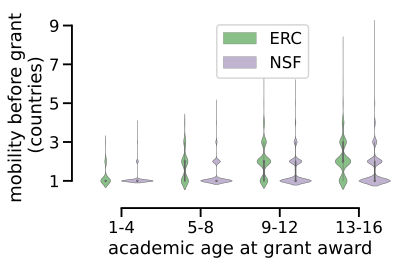

In [261]:

#####################
# Figure 3
###############################################################
ax = fig.add_subplot(spec[0])


with open(path_career+'fig_natphysics_SI_mobility_countries_EU_single.pkl','rb') as f:
    df_= pickle.load(f)

    
palette={'NSF':'#beaed4','ERC':'#7fc97f'}

# ax=sns.boxplot(data=df_, x='age_at_win', y='mobility',hue='grant',showfliers=False,palette=palette,hue_order=['ERC','NSF'] )
ax=sns.violinplot(data=df_, x='age_at_win', y='mobility',linewidth=.5,hue='grant',palette=palette,hue_order=['ERC','NSF'] )
ax.set_ylabel('mobility before grant \n(countries)')
ax.set_xlabel('academic age at grant award')
meanlineprops = dict(linestyle='-', linewidth=2.5, color='white')
sns.despine(ax=ax)
# ax.set_ylabel('% of cross-continental \ncoauthors per grant winner')#,fontsize=ff)
# ax.set_xlabel('')#,fontsize=ff)
# ax.set_yticks(np.array([0,4,8,12]))
ax.set_yticks(np.array([1,3,5,7,9]))

# #plt.xticks(fontsize=ff)
trans = mtransforms.ScaledTranslation(-20/72, 7/72, fig.dpi_scale_trans)
# ax.text(-0.52, 1, 'c)', transform=ax.transAxes,# + trans,
#             fontsize=label_ff, va='bottom', fontfamily='serif')
sns.despine(offset=10, trim=True)
plt.legend(bbox_to_anchor=[.4,.6]);

plt.tight_layout()
plt.savefig('nature_physics_SI_mobility_countries_EU_single.svg',dpi=300, bbox_inches = "tight")
plt.savefig('nature_physics_SI_mobility_countries_EU_single.pdf',dpi=300, bbox_inches = "tight")